In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import sklearn.metrics as sm

In [3]:
df = pd.read_csv(r"C:\Users\lucho\Documents\HPPY Team\MOOC_Deep_Learning\code\data_svm.csv",sep=";")
df = df.astype({'x1':'float64', 'x2':'float64', 'y':'category'})

In [4]:
df

,x1,x2,y
0,1.0,3.0,-1
1,2.0,1.0,-1
2,4.0,5.0,-1
3,6.0,9.0,-1
4,8.0,7.0,-1
5,5.0,1.0,1
6,7.0,1.0,1
7,9.0,4.0,1
8,12.0,7.0,1
9,13.0,6.0,1


In [5]:
def myscatter(df,dfpos,dfneg):
    #nuage de points « blanc » pour définir les dimensions du graphique
    plt.scatter(df.iloc[:,0],df.iloc[:,1],color="white")
    #annotate - positive instances
    for i in dfpos.index:
        plt.annotate(i,xy=(df.loc[i,'x1'],df.loc[i,'x2']),xytext=(-3,-3),textcoords='offset points',color='red')

     #annotate - negative instances
    for i in dfneg.index:
        plt.annotate(i,xy=(df.loc[i,'x1'],df.loc[i,'x2']),xytext=(-3,-3),textcoords='offset points',color='blue')
    return None

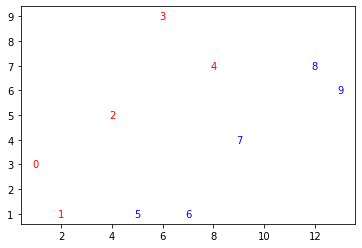

In [6]:
myscatter(df, df[df.y==-1],df[df.y==1])

In [7]:
svm = SVC(kernel='linear')
svm.fit(df.to_numpy()[:,0:2],df.to_numpy()[:,2])
svm.support_vectors_


array([[2., 1.],
       [8., 7.],
       [5., 1.]])

In [8]:
svm.support_


array([1, 4, 5])

In [9]:
svm.dual_coef_

array([[-0.33325096, -0.11109464,  0.44434559]])

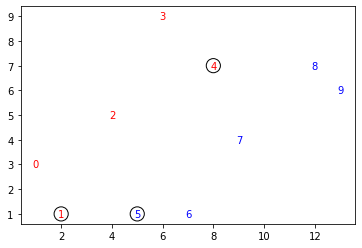

In [10]:
myscatter(df, df[df.y==-1],df[df.y==1])
c1 = svm.support_vectors_[:,0]
c2 = svm.support_vectors_[:,1]
plt.scatter(c1,c2,s=200,facecolors='none',edgecolors='black')
plt.show()


In [11]:
svm.coef_, svm.intercept_

(array([[ 0.66646897, -0.66656782]]), array([-1.66597472]))

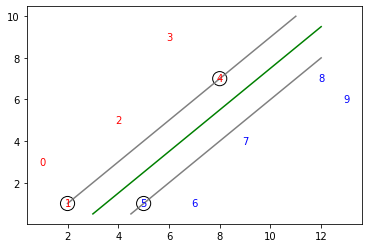

In [12]:
xh = np.array([2,11])
yh = -svm.coef_[0][0]/svm.coef_[0][1]*xh-(svm.intercept_+1.0)/svm.coef_[0][1]
#frontiere f(x) = W'x+b = -1
xb = np.array([4.5,12])
yb = -svm.coef_[0][0]/svm.coef_[0][1]*xb-(svm.intercept_-1.0)/svm.coef_[0][1]

#frontiere f(x) = W'x+b = 0
xf = np.array([3,12])
yf = -svm.coef_[0][0]/svm.coef_[0][1]*xf-svm.intercept_/svm.coef_[0][1]


myscatter(df, df[df.y==-1],df[df.y==1])
c1 = svm.support_vectors_[:,0]
c2 = svm.support_vectors_[:,1]
plt.scatter(c1,c2,s=200,facecolors='none',edgecolors='black')
plt.plot(xf,yf,c='green')
plt.plot(xb,yb,c='gray')
plt.plot(xh,yh,c='gray')
plt.show()

In [13]:
svm.score(df.to_numpy()[:,0:2],df.to_numpy()[:,2])

1.0

In [14]:
svm.predict(df.to_numpy()[:,0:2])

array([-1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.])

In [15]:
df.to_numpy()[:,2]

array([-1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.])

In [16]:
sm.confusion_matrix(df.to_numpy()[:,2], svm.predict(df.to_numpy()[:,0:2]))

array([[5, 0],
       [0, 5]], dtype=int64)

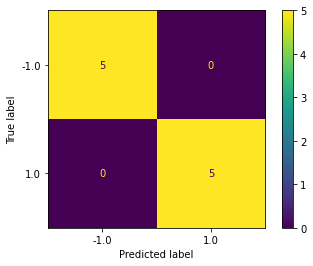

In [17]:
sm.plot_confusion_matrix(svm,df.to_numpy()[:,0:2],df.to_numpy()[:,2])  